In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# converting .csv to dataframe for future work
df = pd.read_csv('Cleaned_movie_data.csv', index_col = 0)


Text(0.5, 1.0, 'Avg Domestic Gross $ Per Genre (2016-2020)')

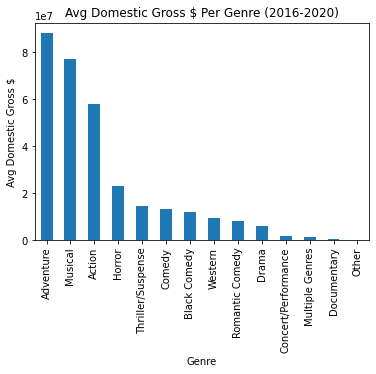

In [3]:
ax=df.groupby('Genre')['DomesticBox_Office'].mean().sort_values(ascending=False).plot(kind='bar', y="Average Domestic Box Office $", stacked=False)

ax.set_ylabel("Avg Domestic Gross $")
ax.set_title("Avg Domestic Gross $ Per Genre (2016-2020)")

Text(0.5, 1.0, 'Count of Movie Titles Per Genre (2016-2020)')

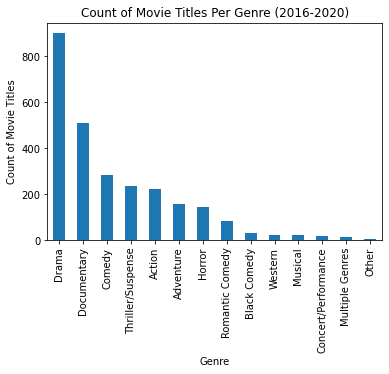

In [4]:
ax2=df.groupby('Genre')['DomesticBox_Office'].count().sort_values(ascending=False).plot(kind='bar', y='DomesticBox_Office', stacked=False)
ax2.set_ylabel("Count of Movie Titles")
ax2.set_title("Count of Movie Titles Per Genre (2016-2020)")

Text(0.5, 1.0, 'Total Domestic Gross $ per Genre (2016-2020)')

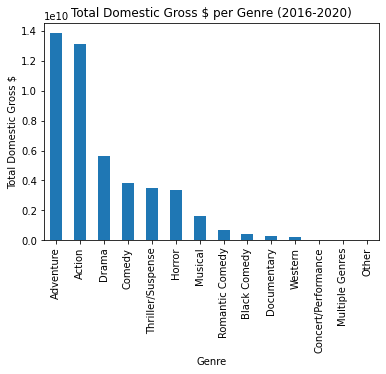

In [5]:
#df.groupby('Genre')['DomesticBox_Office'].sum().plot(kind='bar', y='DomesticBox_Office', stacked=False).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
#ax.set_ylabel
ax3=df.groupby('Genre')['DomesticBox_Office'].sum().sort_values(ascending=False).plot(kind='bar', y='DomesticBox_Office', stacked=False)
ax3.set_ylabel("Total Domestic Gross $")
ax3.set_title("Total Domestic Gross $ per Genre (2016-2020)")

Text(0, 0.5, 'Domestic Gross $')

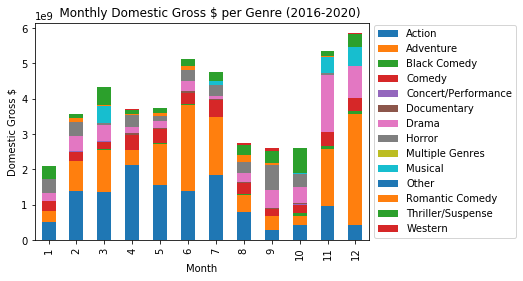

In [7]:
#df.groupby(['Month', 'Genre']).sum().unstack().plot(kind='bar', y='DomesticBox_Office', stacked=True)
ax4 = df.groupby(['Month', 'Genre']).sum().unstack().plot(kind='bar', title='Monthly Domestic Gross $ per Genre (2016-2020)', y='DomesticBox_Office', stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.ylabel("Domestic Gross $")

Text(0, 0.5, 'Count of Movie Titles')

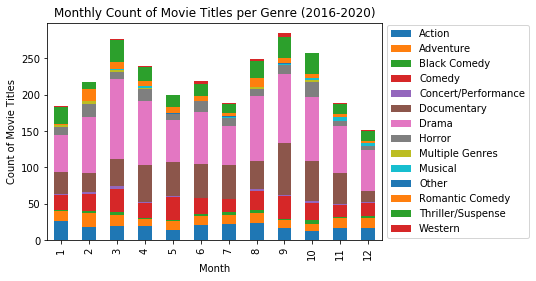

In [7]:
df.groupby(['Month', 'Genre']).count().unstack().plot(kind='bar', title="Monthly Count of Movie Titles per Genre (2016-2020)", y='DomesticBox_Office', stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.ylabel("Count of Movie Titles")

Text(0, 0.5, 'Avg Gross $')

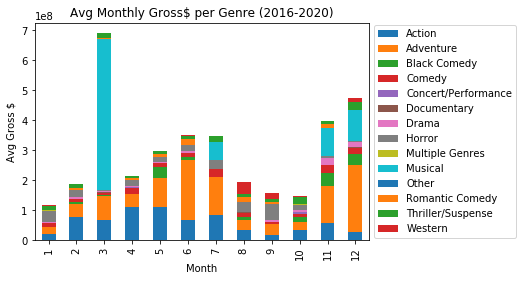

In [10]:
df.groupby(['Month', 'Genre']).mean().unstack().plot(
    kind='bar', title="Avg Monthly Gross$ per Genre (2016-2020)", y='DomesticBox_Office', stacked=True).legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5));
    
plt.ylabel("Avg Gross $")

Text(0, 0.5, 'Total Gross $')

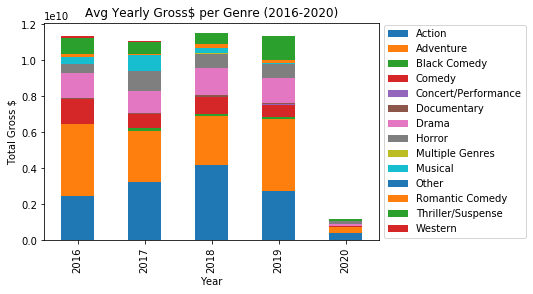

In [11]:
df.groupby(['Year', 'Genre']).sum().unstack().plot(
    kind='bar', title="Avg Yearly Gross$ per Genre (2016-2020)", y='DomesticBox_Office', stacked=True).legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5));

plt.ylabel("Total Gross $")

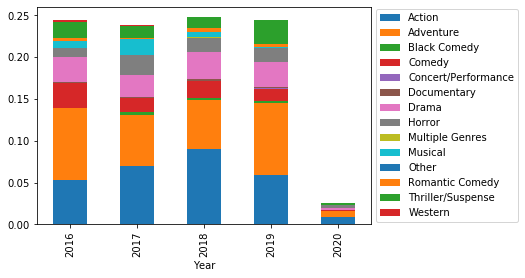

In [12]:
df['percentage'] = df['DomesticBox_Office']/(df['DomesticBox_Office'].sum())

df.groupby(['Year', 'Genre']).sum().unstack().plot(kind='bar', y='percentage', stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [13]:
#trying to find % of % per genre but running out of time - will likely delete
df['IndMov_percentage']=df['DomesticBox_Office']/df['DomesticBox_Office'].sum()

In [14]:
#trying to find % of % per genre but running out of time - will likely delete
a=df.groupby(['Genre','Year'])['IndMov_percentage'].sum()
a

Genre              Year
Action             2016    0.053344
                   2017    0.070300
                   2018    0.090561
                   2019    0.059389
                   2020    0.008388
                             ...   
Thriller/Suspense  2020    0.001374
Western            2016    0.002629
                   2017    0.001965
                   2018    0.000079
                   2019    0.000044
Name: IndMov_percentage, Length: 65, dtype: float64